# K Nearest Neighbour Model

## Connecting the database

In [1]:
import psycopg2
# Database configuration
DB_HOST = 'localhost'
DB_PORT = '5432'
DB_NAME = 'SWARANGI'
DB_USER = 'postgres'
DB_PASSWORD = '19092002'

In [2]:
# Connect to the PostgreSQL database
def connect_db():
    return psycopg2.connect(
        host=DB_HOST,
        port=DB_PORT,
        dbname=DB_NAME,
        user=DB_USER,
        password=DB_PASSWORD
    )

In [3]:
conn = connect_db()
cursor = conn.cursor()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Load and explore data

In [6]:
cursor.execute("SELECT * FROM keystrokes_data;")
records = cursor.fetchall()

# Create a DataFrame from the fetched records
data = pd.DataFrame(records, columns=[desc[0] for desc in cursor.description])

In [7]:
data.head()

,username,h_key1,dd_key1_key2,ud_key1_key2,h_key2,dd_key2_key3,ud_key2_key3,h_key3,dd_key3_key4,ud_key3_key4,...,dd_key5_key6,ud_key5_key6,h_key6,dd_key6_key7,ud_key6_key7,h_key7,dd_key7_key8,ud_key7_key8,h_key8,target
0,Nikhil,0.119,0.272,0.153,0.103,0.208,0.105,0.103,0.288,0.185,...,0.487,0.392,0.216,0.161,-0.055,0.119,0.240,0.121,0.103,Genuine
1,Nikhil,0.119,0.272,0.153,0.103,0.216,0.113,0.103,0.287,0.184,...,0.751,0.608,0.304,0.240,-0.064,0.119,0.225,0.106,0.103,Genuine
2,Nikhil,0.127,0.352,0.225,0.143,0.240,0.097,0.143,0.344,0.201,...,0.614,0.480,0.336,0.265,-0.071,0.135,0.232,0.097,0.143,Genuine
3,Nikhil,0.122,0.315,0.193,0.127,0.200,0.073,0.111,0.400,0.289,...,0.377,0.290,0.206,0.151,-0.055,0.135,0.184,0.049,0.111,Genuine
4,Nikhil,0.143,0.232,0.089,0.119,0.208,0.089,0.127,0.264,0.137,...,0.351,0.264,0.216,0.153,-0.063,0.119,0.160,0.041,0.143,Genuine


In [8]:
data.columns

Index(['username', 'h_key1', 'dd_key1_key2', 'ud_key1_key2', 'h_key2',
       'dd_key2_key3', 'ud_key2_key3', 'h_key3', 'dd_key3_key4',
       'ud_key3_key4', 'h_key4', 'dd_key4_key5', 'ud_key4_key5', 'h_key5',
       'dd_key5_key6', 'ud_key5_key6', 'h_key6', 'dd_key6_key7',
       'ud_key6_key7', 'h_key7', 'dd_key7_key8', 'ud_key7_key8', 'h_key8',
       'target'],
      dtype='object')

# Data Visualization

<AxesSubplot:xlabel='target', ylabel='count'>

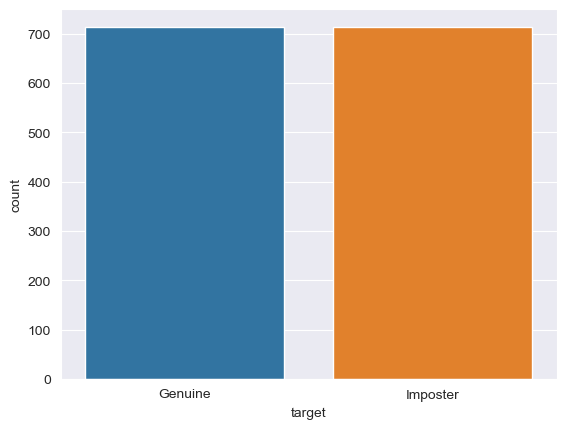

In [10]:
sns.set_style('darkgrid')
sns.countplot(x='target',data=data)

# Split data into train and test data

In [11]:
train, test = train_test_split(data, test_size = 0.2)
features = list(data.columns[1:23])
X_train = train[features]
y_train = train['target']
X_test = test[features]
y_test = test['target']

# Train model with training data.

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
y_test.count()

286

# Predict Results

In [15]:
import warnings
warnings.filterwarnings('ignore')

[[112   6]
 [ 17 151]]


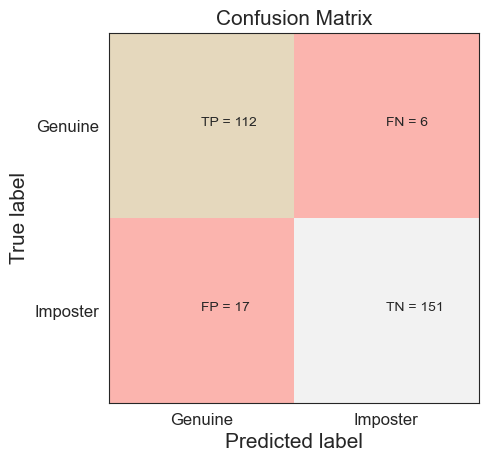

In [16]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.87      0.95      0.91       118
    Imposter       0.96      0.90      0.93       168

    accuracy                           0.92       286
   macro avg       0.92      0.92      0.92       286
weighted avg       0.92      0.92      0.92       286



In [18]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy)

Accuracy of Model is :  0.9195804195804196


In [19]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

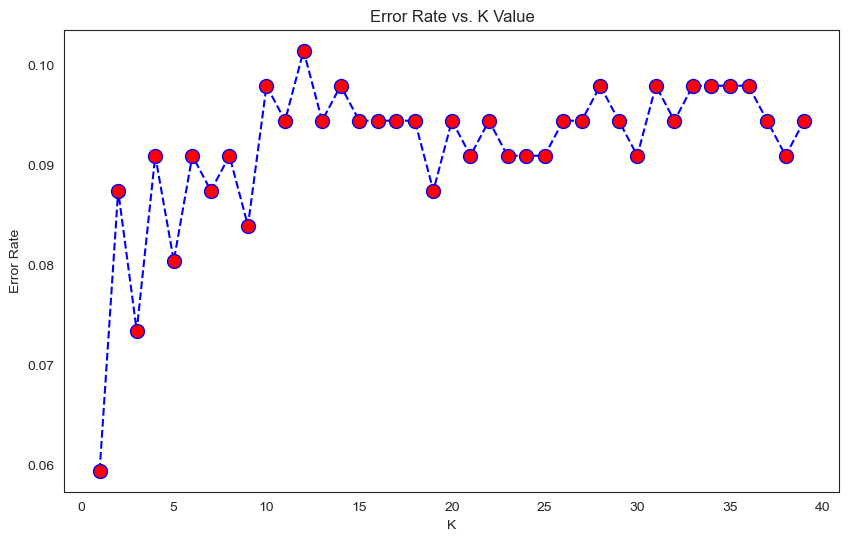

In [20]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [21]:
error_rate = []

# Will take some time
for i in range(1,70):
    train, test = train_test_split(data, test_size = 0.2, random_state=i)
    features = list(data.columns[1:23])
    X = data[features]
    X_train = train[features]
    y_train = train['target']
    X_test = test[features]
    y_test = test['target']    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

(array([0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

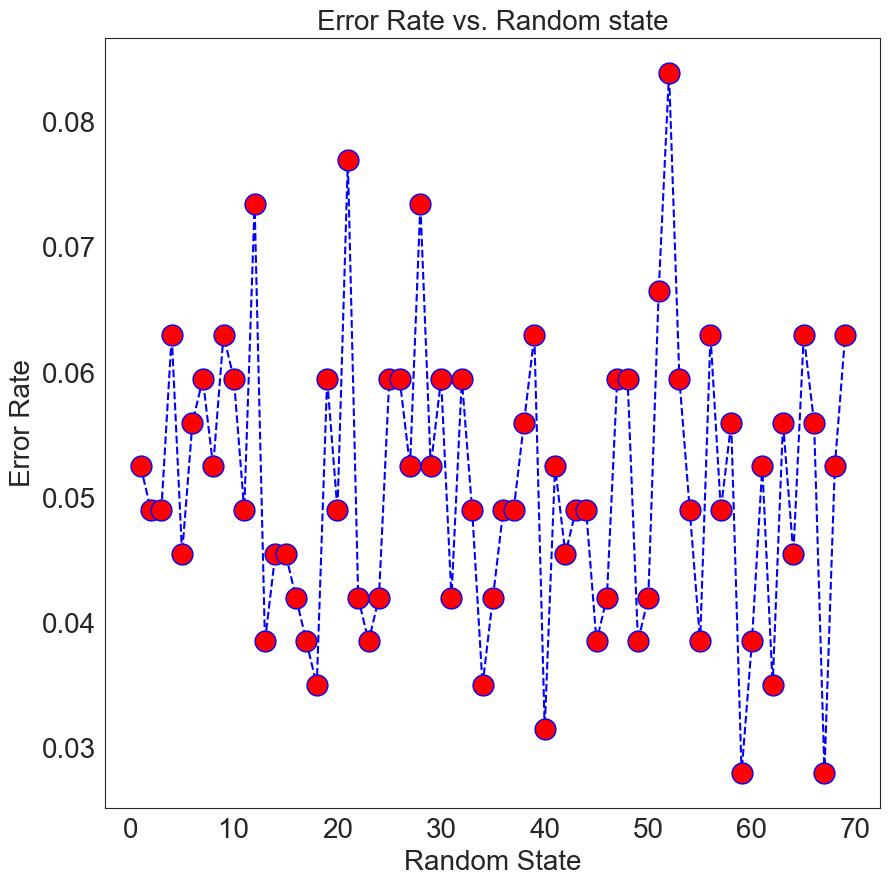

In [22]:
ax =plt.figure(figsize=(10,10))
plt.plot(range(1,70),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=15,)
plt.title('Error Rate vs. Random state',fontsize=20)
plt.xlabel('Random State',fontsize=20)
plt.ylabel('Error Rate',fontsize=20)
# plt.axis([1,70,0.1,])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [23]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\SWARANGI SAWANT\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [24]:
C_prange = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
accuracy = []

for i in C_prange:
      
    train, test = train_test_split(data, test_size = i,random_state = 33)
    features = list(data.columns[1:23])
    X = data[features]
    y =data['target']
    X_train = train[features]
    y_train = train['target']
    X_test = test[features]
    y_test = test['target']
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    model_accuracy = metrics.accuracy_score(y_test,pred)
    accuracy.append(model_accuracy)

Text(0, 0.5, 'Accuracy')

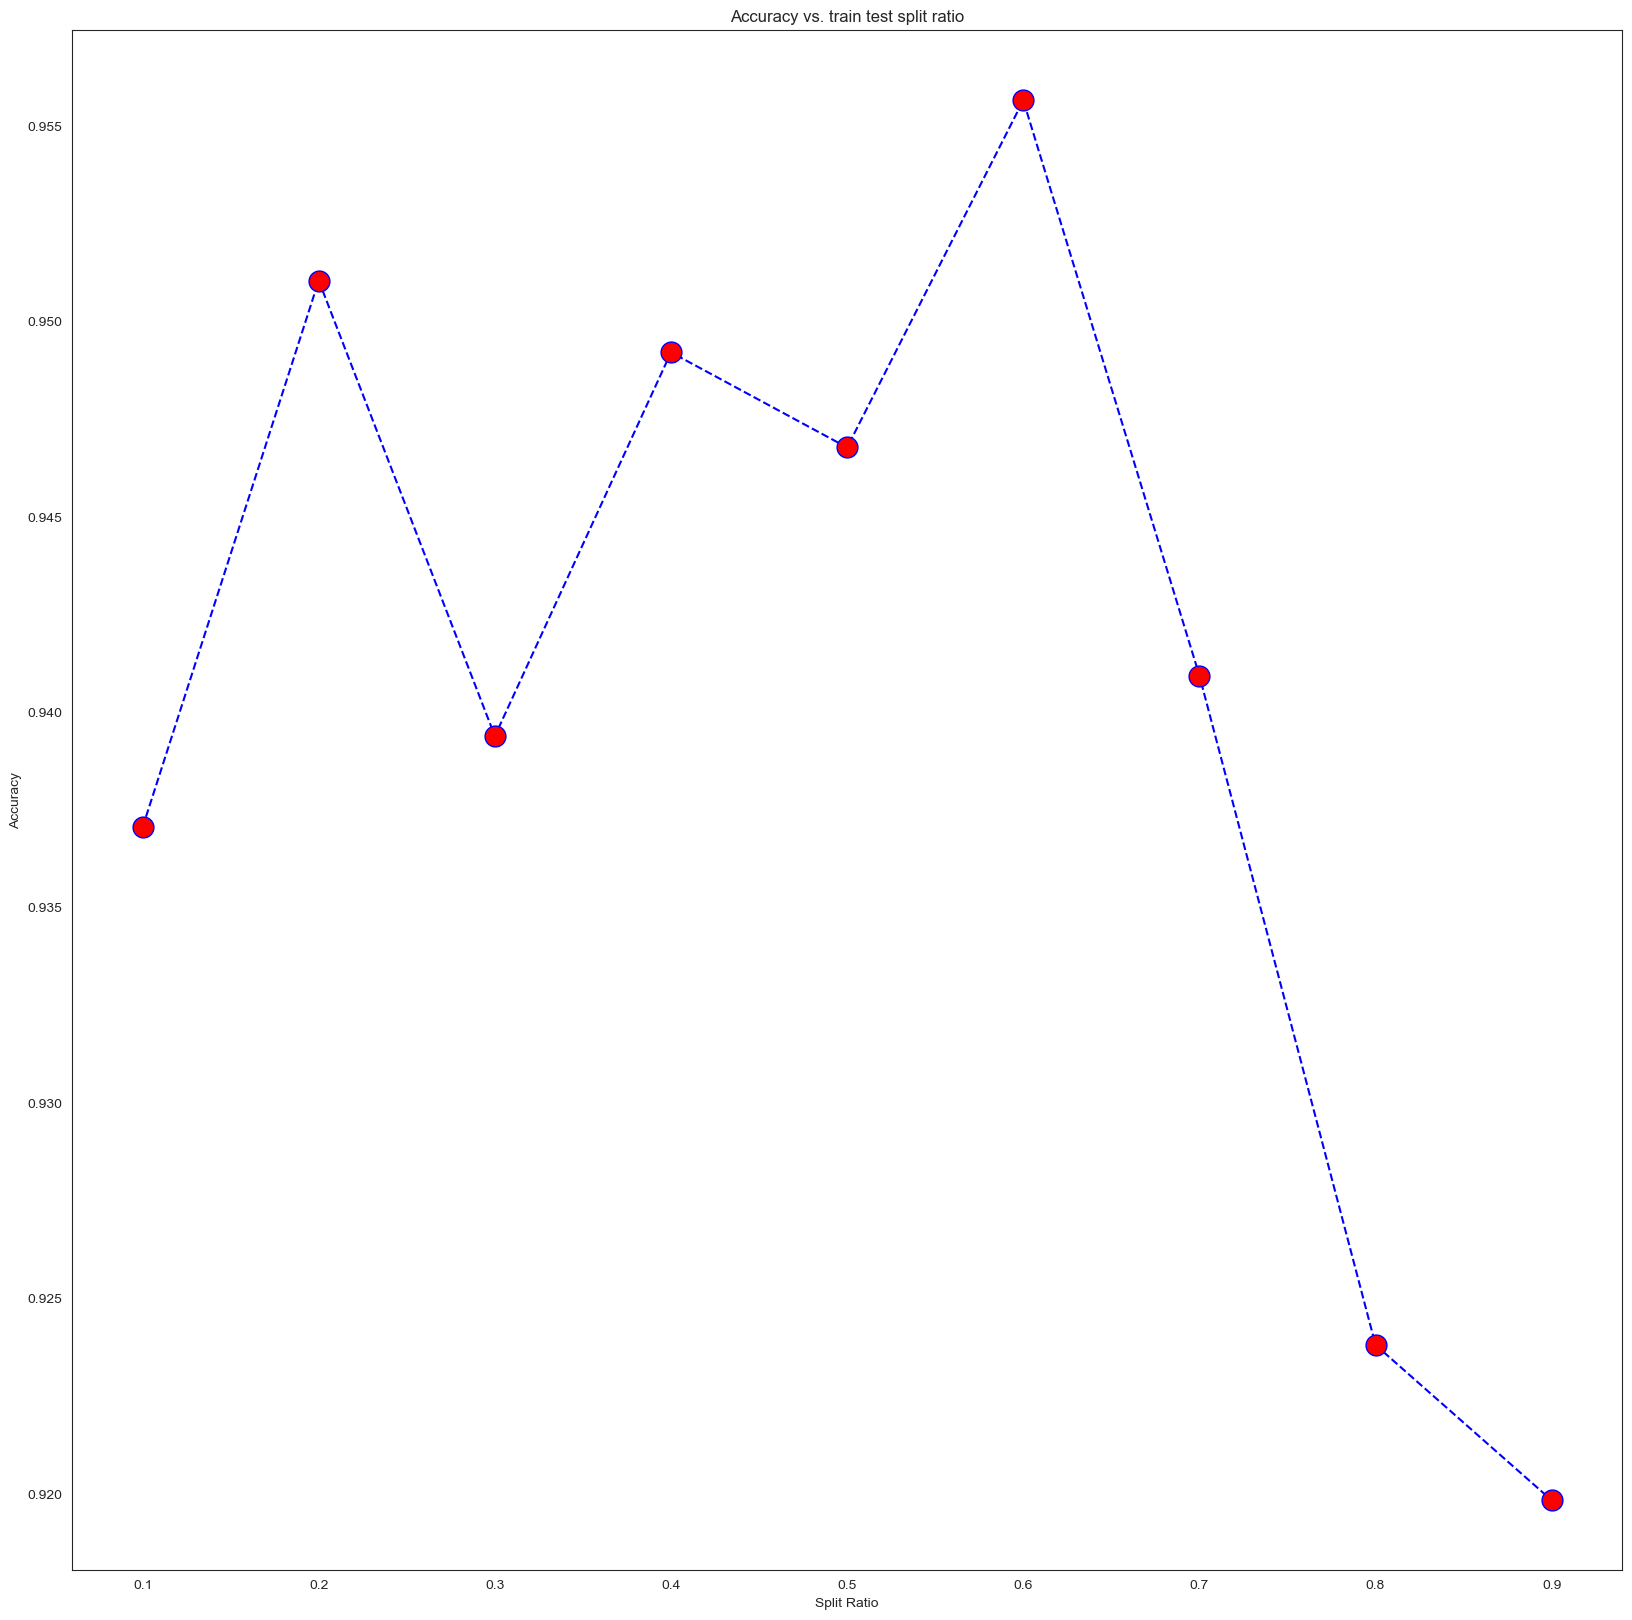

In [25]:
ax =plt.figure(figsize=(20,20))
plt.plot(C_prange,accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=15)
plt.title('Accuracy vs. train test split ratio')
plt.xlabel('Split Ratio')
plt.ylabel('Accuracy')

In [26]:
cursor.execute("SELECT * FROM keystrokes_data;")
records = cursor.fetchall()

# Create a DataFrame from the fetched records
data = pd.DataFrame(records, columns=[desc[0] for desc in cursor.description])

In [27]:
train, test = train_test_split(data, test_size = 0.2, random_state=35)
features = list(data.columns[1:23])


X_train = train[features]
y_train = train['target']
X_test = test[features]
y_test = test['target']
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

[[143   5]
 [  7 131]]


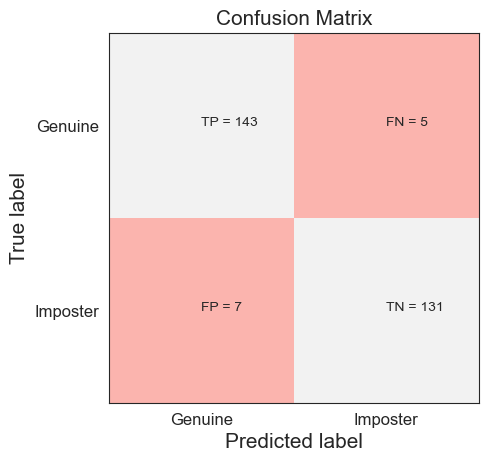

In [28]:
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(confusion_matrix(y_test,pred))
sns.set_style('white')
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
classNames = ['Genuine','Imposter']
plt.title('Confusion Matrix',fontsize = 15)
plt.ylabel('True label',fontsize=15)
plt.xlabel('Predicted label',fontsize=15)
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames,fontsize=12)
plt.yticks(tick_marks, classNames,fontsize=12)
s = [['TP','FN'], ['FP', 'TN']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [29]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Genuine       0.95      0.97      0.96       148
    Imposter       0.96      0.95      0.96       138

    accuracy                           0.96       286
   macro avg       0.96      0.96      0.96       286
weighted avg       0.96      0.96      0.96       286



In [30]:
model_accuracy = metrics.accuracy_score(y_test, pred)
print('Accuracy of Model is : ',model_accuracy)

Accuracy of Model is :  0.958041958041958


In [31]:
import pickle
pickle.dump(knn,open('KNN_model.pkl','wb'))